## Preamble

In [47]:
#pip install sympy
#pip install numpy
#pip install pandas
#pip install matplotlib

In [42]:
import numpy as np
from sympy import symbols, Eq, solve
from sympy.interactive import printing
from sympy import pi
import pandas as pd
import matplotlib.pyplot as plt

## Calibration

### Import data

In [43]:
# File import
with open('calibrationdataVacuum.txt', 'r') as file:
    lines = file.readlines()[0:]

data = []
for line in lines:
    # Split
    parts = line.split()
    
    # Bye first column
    row = parts[2:]
    data.append(row)

# Column names
columns = [
     "Frequency", "Re(1ω)", "Im(1ω)", "Re(3ω)", "Im(3ω)", "Phase(1ω)", "Phase(3ω)",
    "Vref", "Current", "Re(ΔT)", "Δ[Re(ΔT)]", "Im(ΔT)", "Δ[Im(ΔT)]", "Power", "Temperature"
]

# DataFrame
df = pd.DataFrame(data, columns=columns)
print(df)

   Frequency             Re(1ω)              Im(1ω)             Re(3ω)  \
0     10.000  0.188154722112770   0.000000000000004  0.000302510967874   
1     12.743  0.188162819633189  -0.000000000000003  0.000291282705193   
2     16.238  0.188168867443238  -0.000000000000007  0.000280038424339   
3     20.691  0.188169867695215   0.000000000000001  0.000269073677081   
4     26.367  0.188170050381801   0.000000000000004  0.000257984198735   
5     33.598  0.188166347450338  -0.000000000000008  0.000246931643538   
6     42.813  0.188168189596023  -0.000000000000018  0.000235947639074   
7     54.556  0.188166593504188  -0.000000000000007  0.000225077381608   
8     69.519  0.188168467447406   0.000000000000024  0.000214065102526   
9     88.587  0.188163172275789   0.000000000000062  0.000203344970307   
10   112.884  0.188162670313110  -0.000000000000017  0.000192279874141   
11   143.845  0.188158629437361  -0.000000000000023  0.000181326550883   
12   183.298  0.188150827525976  -0.00

In [44]:
df

,Frequency,Re(1ω),Im(1ω),Re(3ω),Im(3ω),Phase(1ω),Phase(3ω),Vref,Current,Re(ΔT),Δ[Re(ΔT)],Im(ΔT),Δ[Im(ΔT)],Power,Temperature
0,10.000,0.188154722112770,0.000000000000004,0.000302510967874,-0.000070525753694,0.000000000001129,-13.123219620804100,0.053454,0.005345,0.956597,0.000000,-0.223016,0.010092,0.001006,26.72
1,12.743,0.188162819633189,-0.000000000000003,0.000291282705193,-0.000071742393931,-0.000000000000896,-13.836446827147803,0.053459,0.005346,0.920999,0.000000,-0.226840,0.010265,0.001006,26.71
2,16.238,0.188168867443238,-0.000000000000007,0.000280038424339,-0.000071814876823,-0.000000000002086,-14.383343655170263,0.053461,0.005346,0.885413,0.000000,-0.227061,0.010275,0.001006,26.71
3,20.691,0.188169867695215,0.000000000000001,0.000269073677081,-0.000071116173245,0.000000000000325,-14.804745304785998,0.053465,0.005347,0.850680,0.000000,-0.224835,0.010174,0.001006,26.68
4,26.367,0.188170050381801,0.000000000000004,0.000257984198735,-0.000071068510128,0.000000000001184,-15.401614811542522,0.053469,0.005347,0.815572,0.000000,-0.224671,0.010167,0.001006,26.67
5,33.598,0.188166347450338,-0.000000000000008,0.000246931643538,-0.000071515717747,-0.000000000002289,-16.151939825910784,0.053471,0.005347,0.780591,0.000000,-0.226073,0.010230,0.001006,26.65
6,42.813,0.188168189596023,-0.000000000000018,0.000235947639074,-0.000070694489416,-0.000000000005465,-16.679235783163360,0.053475,0.005347,0.745821,0.000000,-0.223463,0.010112,0.001006,26.63
7,54.556,0.188166593504188,-0.000000000000007,0.000225077381608,-0.000071035166041,-0.000000000002028,-17.515868552566456,0.053479,0.005348,0.711401,0.000000,-0.224520,0.010160,0.001006,26.60
8,69.519,0.188168467447406,0.000000000000024,0.000214065102526,-0.000070897293449,0.000000000007445,-18.324612889245586,0.053481,0.005348,0.676567,0.000000,-0.224076,0.010140,0.001006,26.59
9,88.587,0.188163172275789,0.000000000000062,0.000203344970307,-0.000070096595864,0.000000000019013,-19.019975229628091,0.053485,0.005348,0.642645,0.000000,-0.221531,0.010025,0.001006,26.57


### Korrelationsgleichung fuer die Kalibrierung

In [45]:
# LaTeX rendering
printing.init_printing()

In [46]:
# Define variables
dRdT = symbols('dR/dT')
dVdf= symbols('dV3w/dlnf')
dR,dT,L,lambda_sub,lambda_air,f,P,I = symbols('dR dT L lambda_sub lambda_air f P I')


In [47]:
equation_dRdT = Eq( ((-4*pi*L)/(P*I))*(lambda_sub)*(dVdf)- dRdT,0)

In [48]:
display(equation_dRdT)

### dR/dT Berechnung (unter Vacuum)

#### Parameters fuer die Berechnung

In [62]:
# Geometrie und Bedingungen
T_ref=23                  # Room temperature, 24 04.12.24

# Slope dRe(V3w)/dlnf Berechnung
v3w=df['Re(3ω)'].values
f=df['Frequency'].values
v3w=v3w.astype(float)
f=f.astype(float)

## dRdT Berechnung

L_mess=1500e-6
P_mess= df['Power'].values
P_mess=P_mess.astype(float)

I_mess= df['Current'].values
I_mess=I_mess.astype(float)

#### Substrate thermal conductivity

In [63]:
lambda_substrate_ref= 1.2 # Temperature 20C

In [64]:
lambdaSubstrate=lambda lambda_substrate_ref,T: lambda_substrate_ref + 0.0013*(T-20)

#### Slope dRe(V3w)/dln(f)

In [65]:
v3w

array([0.00030251, 0.00029128, 0.00028004, 0.00026907, 0.00025798,
       0.00024693, 0.00023595, 0.00022508, 0.00021407, 0.00020334,
       0.00019228, 0.00018133, 0.00017091, 0.00016004, 0.0001497 ,
       0.00013921, 0.00012922, 0.000119  , 0.00010925, 0.00010145])

In [66]:
lnf=np.log(f)

In [67]:
print(v3w)
print(f)
print(lnf)

[0.00030251 0.00029128 0.00028004 0.00026907 0.00025798 0.00024693
 0.00023595 0.00022508 0.00021407 0.00020334 0.00019228 0.00018133
 0.00017091 0.00016004 0.0001497  0.00013921 0.00012922 0.000119
 0.00010925 0.00010145]
[  10.      12.743   16.238   20.691   26.367   33.598   42.813   54.556
   69.519   88.587  112.884  143.845  183.298  233.572  297.635  379.269
  483.293  615.848  784.76  1000.   ]
[2.30258509 2.5449821  2.78735417 3.02969882 3.27211323 3.51446654
 3.75684179 3.9992277  4.2416001  4.48398512 4.72636074 4.96873633
 5.21111324 5.45349038 5.6958679  5.93824572 6.18062309 6.42300018
 6.66537794 6.90775528]


Slope: -4.417865266570014e-05, Intercept: 0.0004023822864243119


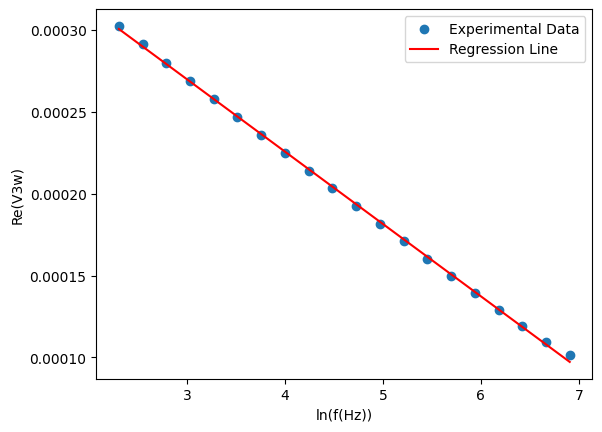

In [68]:
X=lnf
Y=v3w
# Perform linear regression using NumPy's polyfit
coefficients = np.polyfit(X, Y, 1)
slope, intercept = coefficients

# Print the slope and intercept
print(f"Slope: {slope}, Intercept: {intercept}")

# Linear regression
Y_pred = slope * X + intercept

# Plot the data and regression line
plt.scatter(X, Y, label='Experimental Data')
plt.plot(X, Y_pred, color='red', label='Regression Line')
plt.xlabel('ln(f(Hz))')
plt.ylabel('Re(V3w)')
plt.legend()
plt.show()

In [69]:
# Sölope 'dV3w/dlnf' calculated for dR/dT calculation

dVdf_mess=slope
print(dVdf_mess)

-4.417865266570014e-05


#### dR/dT Berechnung

In [70]:
P_mean= np.mean(P_mess)
I_mean= np.mean(I_mess)
lambdaSubstrate_mess=lambdaSubstrate(lambda_substrate_ref,T_ref)
print(P_mean)
print(I_mean)
print(lambdaSubstrate_mess)

0.001006
0.005348199999999999
1.2039


In [71]:
substituted_eq = equation_dRdT.subs({P: P_mean, I:I_mean, lambda_sub:lambdaSubstrate_mess,dVdf:dVdf_mess, L:L_mess})

In [72]:
substituted_eq

In [73]:
sol = solve(substituted_eq, dRdT)

In [74]:
dRdT_mess=float(sol[0])
print(dRdT_mess)

0.18633669318182142


## Messung

### Import data

In [75]:
# File import
with open('Messung051224\GreaseDataVacuum2.txt', 'r') as file:
    lines = file.readlines()[0:]

data_sample = []
for line in lines:
    # Split
    parts = line.split()
    
    # Bye first column
    row = parts[2:]
    data_sample.append(row)

# Column names
columns = [
     "Frequency", "Re(1ω)", "Im(1ω)", "Re(3ω)", "Im(3ω)", "Phase(1ω)", "Phase(3ω)",
    "Vref", "Current", "Re(ΔT)", "Δ[Re(ΔT)]", "Im(ΔT)", "Δ[Im(ΔT)]", "Power", "Temperature"
]

# DataFrame
df_sample = pd.DataFrame(data_sample, columns=columns)
print(df_sample)

   Frequency             Re(1ω)              Im(1ω)             Re(3ω)  \
0     10.000  0.184538125779223  -0.000000000000001  0.000260284902927   
1     12.743  0.184527951048414  -0.000000000000002  0.000250084048923   
2     16.238  0.184504693118488   0.000000000000005  0.000239972451028   
3     20.691  0.184499519764987   0.000000000000002  0.000229862855132   
4     26.367  0.184487523447794   0.000000000000002  0.000219747633983   
5     33.598  0.184476692748390   0.000000000000010  0.000209765089073   
6     42.813  0.184444822418001  -0.000000000000008  0.000199987830451   
7     54.556  0.184435061591278   0.000000000000031  0.000190026290874   
8     69.519  0.184411169629371   0.000000000000016  0.000180110240029   
9     88.587  0.184392065839408  -0.000000000000016  0.000170435671301   
10   112.884  0.184377184009095  -0.000000000000054  0.000160776520971   
11   143.845  0.184376680275500   0.000000000000020  0.000151225571823   
12   183.298  0.184254701106571  -0.00

<>:2: SyntaxWarning: invalid escape sequence '\G'
<>:2: SyntaxWarning: invalid escape sequence '\G'
C:\Users\rinc\AppData\Local\Temp\ipykernel_16904\578201029.py:2: SyntaxWarning: invalid escape sequence '\G'
  with open('Messung051224\GreaseDataVacuum2.txt', 'r') as file:


In [76]:
dRdT_mess=float(sol[0])

In [77]:
print(dRdT_mess)

0.18633669318182142


### Korrelationsgleichung fuer die Messung

In [78]:
# Define variables
dRdT = symbols('dR/dT')
dVdf= symbols('dV3w/dlnf')
dR,dT,L,lambda_sample,lambda_sub,f,P,I = symbols('dR dT L lambda_sample, lambda_sub f P I')

In [79]:
equation_lambdaSample= Eq( (-P*I*dRdT/(4*pi*L))*(dVdf)**(-1)-lambda_sub-lambda_sample,0)

In [80]:
display(equation_lambdaSample)

### Thermal conductivity Berechnung

#### Parameters fuer die Berechnung

In [81]:
# Geometrie und Bedingungen
T_ref=40                  # Room temperature
#lambda_substrate_ref= 2 # Temperature 20C
print(dRdT_mess)

# Slope dRe(V3w)/dlnf Berechnung
v3w = df_sample['Re(3ω)'].values
f   = df_sample['Frequency'].values
v3w = v3w.astype(float)
f   = f.astype(float)

## dRdT Berechnung

L_mess=1500e-6
P_mess = df_sample['Power'].values
P_mess = P_mess.astype(float)

I_mess = df_sample['Current'].values
I_mess = I_mess.astype(float)

0.18633669318182142


In [82]:
lambdaSubstrate_mess=lambdaSubstrate(lambda_substrate_ref,T_ref)
lambdaSubstrate_mess

#### Slope dRe(V3w)/dln(f)

In [83]:
v3w

array([2.60284903e-04, 2.50084049e-04, 2.39972451e-04, 2.29862855e-04,
       2.19747634e-04, 2.09765089e-04, 1.99987830e-04, 1.90026291e-04,
       1.80110240e-04, 1.70435671e-04, 1.60776521e-04, 1.51225572e-04,
       1.41616239e-04, 1.32369446e-04, 1.23226465e-04, 1.14353395e-04,
       1.05819575e-04, 9.73524756e-05, 8.88867337e-05, 8.25636388e-05])

In [84]:
f

array([  10.   ,   12.743,   16.238,   20.691,   26.367,   33.598,
         42.813,   54.556,   69.519,   88.587,  112.884,  143.845,
        183.298,  233.572,  297.635,  379.269,  483.293,  615.848,
        784.76 , 1000.   ])

In [85]:
lnf=np.log(f)

In [86]:
lnf

array([2.30258509, 2.5449821 , 2.78735417, 3.02969882, 3.27211323,
       3.51446654, 3.75684179, 3.9992277 , 4.2416001 , 4.48398512,
       4.72636074, 4.96873633, 5.21111324, 5.45349038, 5.6958679 ,
       5.93824572, 6.18062309, 6.42300018, 6.66537794, 6.90775528])

Slope: -3.91448636189601e-05, Intercept: 0.00034769215518705096


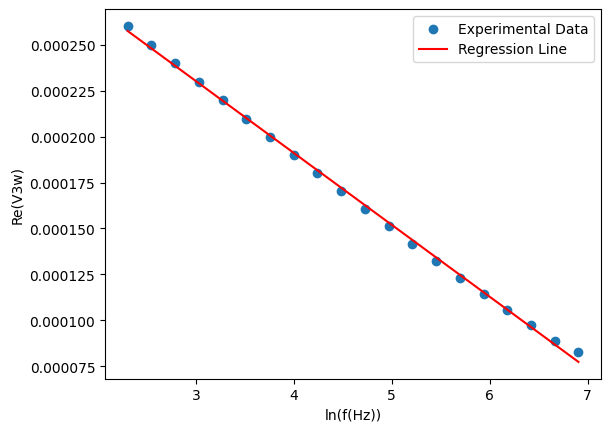

In [87]:
X=lnf
Y=v3w
# Perform linear regression using NumPy's polyfit
coefficients = np.polyfit(X, Y, 1)
slope, intercept = coefficients

# Print the slope and intercept
print(f"Slope: {slope}, Intercept: {intercept}")

# Linear regression
Y_pred = slope * X + intercept

# Plot the data and regression line
plt.scatter(X, Y, label='Experimental Data')
plt.plot(X, Y_pred, color='red', label='Regression Line')
plt.xlabel('ln(f(Hz))')
plt.ylabel('Re(V3w)')
plt.legend()
plt.show()

In [88]:
# Sölope 'dV3w/dlnf' calculated for dR/dT calculation

dVdf_mess=slope
print(dVdf_mess)

-3.91448636189601e-05


#### Thermal conductivity der Probe Berechnung

In [89]:
P_mean= np.mean(P_mess)
I_mean= np.mean(I_mess)
print(P_mean)
print(I_mean)
print(lambdaSubstrate_mess)
print(dRdT_mess)

0.0009600499999999999
0.005206400000000001
1.226
0.18633669318182142


In [90]:
substituted_eqLambdaSample = equation_lambdaSample.subs({dRdT:dRdT_mess,P: P_mean, I:I_mean, lambda_sub:lambdaSubstrate_mess,dVdf:dVdf_mess, L:L_mess})

In [91]:
substituted_eqLambdaSample

In [92]:
solSample = solve(substituted_eq, dRdT)

In [93]:
lambdaSample_mess=float(solSample[0])
lambdaSample_mess

In [94]:
lambdaSubstrate_mess